In [19]:
import numpy as np
import os
import subprocess
#import theano
import gzip

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv1D, AveragePooling1D, MaxPooling1D, TimeDistributed, LeakyReLU, BatchNormalization, Flatten
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras import regularizers

import keras
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate, Conv1D, BatchNormalization, Flatten
from keras.optimizers import Adagrad, Adam
from keras.utils import plot_model
from keras import regularizers

from keras.utils import plot_model
import matplotlib.pyplot as plt
import pickle
#from keras.models import load_model


In [17]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

import sys
!{sys.executable} -m pip install matplotlib

In [5]:
def get_split(X_train, X_valid, classSize, pssm = False):

    if not pssm:
        return (X_train[:,:,0:21], X_train[:,:,21 : (21+classSize)], 
                X_valid[:,:,0:21], X_valid[:,:,21 : (21+classSize)])
    else:
        return (X_train[:,:,21+classSize:], X_train[:,:,21 : (21+classSize)],
                X_valid[:,:,21+classSize:], X_valid[:,:,21 : (21+classSize)])

In [6]:
windowSize = 19 #19
predictionIndex = 9
classSize = 8  # 2 or 3 
numberOfFeatures = 50 #50 #44 #45


In [7]:
#X_train_window = np.load('X_train_window19Middle.npy') # load
#X_valid_window = np.load('X_valid_window19Middle.npy') # load

In [8]:
f = gzip.GzipFile('X_train_window19Middle.npy.gz', "r")
X_train_window = np.load(f)

In [9]:
f = gzip.GzipFile('X_valid_window19Middle.npy.gz', "r")
X_valid_window = np.load(f)

In [10]:
#a = get_tapped_one_dataset(X_train_window, windowSize, classSize)
#b = get_tapped_one_dataset(X_valid_window, windowSize, classSize)

x_train_final, y_train_final, x_valid_final, y_valid_final = get_split(X_train_window, X_valid_window, classSize, pssm = True)
print(x_train_final.shape, "training data")
print(y_train_final.shape, "labels for training data")
print(x_valid_final.shape, "validation data")
print(y_valid_final.shape, "labels for training validation")

y_train_final = y_train_final[:,0,:]
print(y_train_final.shape)

y_valid_final = y_valid_final[:,0,:]
print(y_valid_final.shape)

(1082350, 19, 21) training data
(1082350, 19, 8) labels for training data
(51152, 19, 21) validation data
(51152, 19, 8) labels for training validation
(1082350, 8)
(51152, 8)


In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, AveragePooling1D, MaxPooling1D, TimeDistributed, LeakyReLU, BatchNormalization, Flatten
from keras import optimizers, callbacks
from keras.regularizers import l2
# import keras.backend as K
import tensorflow as tf


nn_epochs = 15

   
LR = 0.0009 # maybe after some (10-15) epochs reduce it to 0.0008-0.0007
drop_out = 0.4
batch_dim = 64

loss = 'categorical_crossentropy'

input_shape = (windowSize, 21)

conv1_input = Input(shape=(windowSize, 21), name='InputWindow')
conv_1 = Conv1D( 64, 3,  strides=1, padding='same', activation='relu', use_bias=True)(conv1_input)
conv_1 = BatchNormalization(name='BN1')(conv_1)
conv_1 = Dropout(drop_out)(conv_1)
conv_2 = Conv1D( 64, 3, strides=1, padding='same', activation='relu', use_bias=True)(conv_1)
conv_2 = BatchNormalization(name='BN2')(conv_2)
conv_2 = Dropout(drop_out)(conv_2)
conv_3 = Conv1D( 64, 3,  strides=1, padding='same', activation='relu', use_bias=True)(conv_2)
conv_3 = BatchNormalization(name='BN3')(conv_3)
conv_3 = Dropout(drop_out)(conv_3)



conv_4 = Conv1D( 64, 3, strides=1, padding='same', activation='relu', use_bias=True)(conv_3)
conv_4 = BatchNormalization(name='BN4')(conv_4)
conv_4 = Dropout(drop_out)(conv_4)
conv_5 = Conv1D( 64, 3,  strides=1, padding='same', activation='relu', use_bias=True)(conv_4)
conv_5 = BatchNormalization(name='BN5')(conv_5)
conv_5 = Dropout(drop_out)(conv_5)
    #conv_6 = Conv1D( 73, 3, strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg)(conv_5)
    #conv_6 = BatchNormalization(name='BN6')(conv_6)


    #conv_7 = Conv1D( 73, 3,  strides=1, padding='same', activation='relu', use_bias=True, kernel_regularizer=w_reg)(conv_6)
    #conv_7 = BatchNormalization(name='BN7')(conv_7)
    #conv_8 = Conv1D( 4, 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg)(conv_7)
    #conv_8 = BatchNormalization(name='BN8')(conv_8)
    #conv_9 = Conv1D( 4, 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg)(conv_8)
    #conv_9 = BatchNormalization(name='BN9')(conv_9)


flatten  = Flatten()(conv_5)
first_dense = Dense(128, activation='relu', use_bias=True)(flatten)
second_dense = Dense(32, activation='relu', use_bias=True)(first_dense)

final_model_output = Dense(classSize, activation = 'softmax', name='softmax')(second_dense)

m = Model(inputs=conv1_input, outputs=final_model_output)

opt = Adam(lr=LR)
m.compile(optimizer=opt, loss=loss,metrics=['accuracy', 'mae'])

print("\nHyper Parameters\n")
print("Learning Rate: " + str(LR))
print("Drop out: " + str(drop_out))
print("Batch dim: " + str(batch_dim))
print("Number of epochs: " + str(nn_epochs))
#print("Regularizers: " + str(w_reg.l2))
print("\nLoss: " + loss + "\n")
m.summary()

#import os
 #os.environ["PATH"] += os.pathsep + 'C:/Users/Ieremie/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin'

 #plot_model(m)#, to_file='model.png')

    


Hyper Parameters

Learning Rate: 0.0009
Drop out: 0.4
Batch dim: 64
Number of epochs: 15

Loss: categorical_crossentropy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputWindow (InputLayer)     (None, 19, 21)            0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 19, 64)            4096      
_________________________________________________________________
BN1 (BatchNormalization)     (None, 19, 64)            256       
_________________________________________________________________
dropout_66 (Dropout)         (None, 19, 64)            0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 19, 64)            12352     
_________________________________________________________________
BN2 (BatchNormalization)     (None, 19, 64)            256       
___________________

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, AveragePooling1D, MaxPooling1D, TimeDistributed, LeakyReLU, BatchNormalization, Flatten
from keras import optimizers, callbacks
from keras.regularizers import l2
# import keras.backend as K
import tensorflow as tf

LR = 0.0009 # maybe after some (10-15) epochs reduce it to 0.0008-0.0007
drop_out = 0.5
batch_dim = 64
nn_epochs = 20
w_reg = regularizers.l2(0) # 0.0003)
number_filters = 16

loss = 'categorical_crossentropy'



input_shape = (windowSize, 21)

conv1_input = Input(shape=(windowSize, 21), name='InputWindow')

conv_1 = Conv1D( 64 , 19,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network1-filter1')(conv1_input)
conv_1 = BatchNormalization(name='BN1')(conv_1)
conv_1 = Dropout(drop_out)(conv_1)
conv_2 = Conv1D( 64 , 11,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network1-filter2')(conv1_input)
conv_2 = BatchNormalization(name='BN2')(conv_2)
conv_2 = Dropout(drop_out)(conv_2)
conv_3 = Conv1D( 64 , 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network1-filter3')(conv1_input)
conv_3 = BatchNormalization(name='BN3')(conv_3)
conv_3 = Dropout(drop_out)(conv_3)

merge_1 = concatenate([conv_1, conv_2, conv_3], name='Network1')
input_for_second = concatenate([conv1_input, merge_1], name='Network1-and-input')



conv_4 = Conv1D( 64 , 19,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network2-filter1')(input_for_second)
conv_4 = BatchNormalization(name='BN4')(conv_4)
conv_4 = Dropout(drop_out)(conv_4)
conv_5 = Conv1D( 64 , 11,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network2-filter2')(input_for_second)
conv_5 = BatchNormalization(name='BN5')(conv_5)
conv_5 = Dropout(drop_out)(conv_5)
conv_6 = Conv1D( 64 , 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network2-filter3')(input_for_second)
conv_6 = BatchNormalization(name='BN6')(conv_6)
conv_6 = Dropout(drop_out)(conv_6)

merge_2 = concatenate([conv_4, conv_5, conv_6], name='Network2')
input_for_third = concatenate([conv1_input, merge_1, merge_2],name='Network1-Network2-and-input')



conv_7 = Conv1D( 64 , 19,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network3-filter1')(input_for_third)
conv_7 = BatchNormalization(name='BN7')(conv_7)
conv_7 = Dropout(drop_out)(conv_7)
conv_8 = Conv1D( 64 , 11,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network3-filter2')(input_for_third)
conv_8 = BatchNormalization(name='BN8')(conv_8)
conv_8 = Dropout(drop_out)(conv_8)
conv_9 = Conv1D( 64 , 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network3-filter3')(input_for_third)
conv_9 = BatchNormalization(name='BN9')(conv_9)
conv_9 = Dropout(drop_out)(conv_9)

merge_3 = concatenate([conv_7, conv_8, conv_9],name='Network3')
input_for_4 = concatenate([conv1_input, merge_1, merge_2, merge_3],name='Network123-and-input')



conv_10 = Conv1D( 64 , 19,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network4-filter1')(input_for_4)
conv_10 = BatchNormalization(name='BN10')(conv_10)
conv_10 = Dropout(drop_out)(conv_10)
conv_11 = Conv1D( 64 , 11,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network4-filter2')(input_for_4)
conv_11 = BatchNormalization(name='BN11')(conv_11)
conv_11 = Dropout(drop_out)(conv_11)
conv_12 = Conv1D( 64 , 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network4-filter3')(input_for_4)
conv_12 = BatchNormalization(name='BN12')(conv_12)
conv_12 = Dropout(drop_out)(conv_12)

merge_4 = concatenate([conv_10, conv_11, conv_12],name='Network4')
input_for_5 = concatenate([conv1_input, merge_1, merge_2, merge_3, merge_4],name='Network1234-and-input')



conv_13 = Conv1D( 64 , 19,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network5-filter1')(input_for_5)
conv_13 = BatchNormalization(name='BN13')(conv_13)
conv_13 = Dropout(drop_out)(conv_13)
conv_14 = Conv1D( 64 , 11,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network5-filter2')(input_for_5)
conv_14 = BatchNormalization(name='BN14')(conv_14)
conv_14 = Dropout(drop_out)(conv_14)
conv_15 = Conv1D( 64 , 3,  strides=1, padding='same', activation='relu', use_bias=True,kernel_regularizer=w_reg, name='Network5-filter3')(input_for_5)
conv_15 = BatchNormalization(name='BN15')(conv_15)
conv_15 = Dropout(drop_out)(conv_15)

merge_5 = concatenate([conv_13, conv_14, conv_15],name='Network5')



merge_final = concatenate([merge_1, merge_2, merge_3,merge_4, merge_5], name='Final')



flatten  = Flatten()(merge_final)
first_dense = Dense(128, activation='relu', use_bias=True,  kernel_regularizer=w_reg, name='last')(flatten)
first_dense = BatchNormalization(name='BN16')(first_dense)

second_dense = Dense(32, activation='relu', use_bias=True,  kernel_regularizer=w_reg, name='last')(flatten)
second_dense = BatchNormalization(name='BN16')(second_dense)

final_model_output = Dense(classSize, activation = 'softmax', name='softmax')(first_dense)

m = Model(inputs=conv1_input, outputs=final_model_output)

opt = Adam(lr=LR)
m.compile(optimizer=opt, loss=loss,metrics=['accuracy', 'mae'])

print("\nHyper Parameters\n")
print("Learning Rate: " + str(LR))
print("Drop out: " + str(drop_out))
print("Batch dim: " + str(batch_dim))
print("Number of epochs: " + str(nn_epochs))
print("Regularizers: " + str(w_reg.l2))
print("\nLoss: " + loss + "\n")
m.summary()

#import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/Ieremie/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin'
#from keras.utils import plot_model
#plot_model(m)#, to_file='model.png')


Hyper Parameters

Learning Rate: 0.0009
Drop out: 0.5
Batch dim: 64
Number of epochs: 20
Regularizers: 0.0

Loss: categorical_crossentropy

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputWindow (InputLayer)        (None, 19, 21)       0                                            
__________________________________________________________________________________________________
Network1-filter1 (Conv1D)       (None, 19, 64)       25600       InputWindow[0][0]                
__________________________________________________________________________________________________
Network1-filter2 (Conv1D)       (None, 19, 64)       14848       InputWindow[0][0]                
__________________________________________________________________________________________________
Network1-filter3 (Conv1D)       (None, 19, 64)       4096        In

In [13]:
from keras.callbacks import ModelCheckpoint

filepath="best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=1)
callbacks_list = [checkpoint]

In [14]:
from time import time
from timeit import default_timer as timer

start_time = timer()
history = m.fit(x_train_final, y_train_final, epochs=nn_epochs, batch_size=batch_dim,
                validation_data=(x_valid_final, y_valid_final) ,shuffle=True,  callbacks=callbacks_list)

end_time = timer()
print("\n\nTime elapsed: " + "{0:.2f}".format((end_time - start_time)) + " s")

W0401 13:47:03.679962 16120 deprecation.py:323] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1082350 samples, validate on 51152 samples
Epoch 1/20
1082350/1082350 [==============================] - 523s 484us/step - loss: 0.9076 - acc: 0.6725 - mean_absolute_error: 0.1075 - val_loss: 0.8112 - val_acc: 0.7029 - val_mean_absolute_error: 0.0978

Epoch 00001: val_acc improved from -inf to 0.70287, saving model to best.hdf5
Epoch 2/20
1082350/1082350 [==============================] - 514s 475us/step - loss: 0.8308 - acc: 0.6992 - mean_absolute_error: 0.0999 - val_loss: 0.7820 - val_acc: 0.7156 - val_mean_absolute_error: 0.0932

Epoch 00002: val_acc improved from 0.70287 to 0.71563, saving model to best.hdf5
Epoch 3/20
1082350/1082350 [==============================] - 518s 478us/step - loss: 0.8000 - acc: 0.7100 - mean_absolute_error: 0.0967 - val_loss: 0.7563 - val_acc: 0.7239 - val_mean_absolute_error: 0.0918

Epoch 00003: val_acc improved from 0.71563 to 0.72388, saving model to best.hdf5
Epoch 4/20
1082350/1082350 [==============================] - 511s 472us/step - l

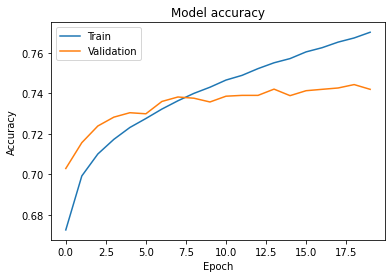

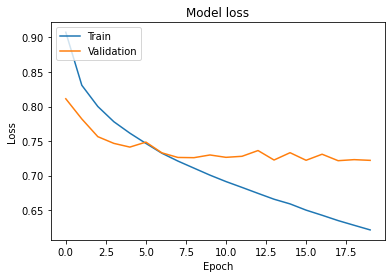

In [20]:


accuracyName = 'accuracyMiddlewindowQ2W19Model2.png'
lossName = 'lossMiddlewindowQ2W19Model2.png'

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig(accuracyName)
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
#plt.savefig(lossName)
plt.show()




In [22]:
f = gzip.GzipFile('cb513_window19Q8.npy.gz', "r")
X_test_window = np.load(f)

In [ ]:
c = get_tapped_one_dataset(X_test_window, windowSize, classSize)
print(c.shape)

In [23]:
x_test_final = X_test_window[:,:,(21+classSize):]
#x_test_final = X_test_window[:,:,0:21]
y_test_final = X_test_window[:,:,21: (21+classSize)]
print(x_test_final.shape)
print(y_test_final.shape)

(80119, 19, 21)
(80119, 19, 8)


In [24]:
y_test_final = np.reshape(y_test_final, (80119,19*8))
print(y_test_final.shape)
y_test_final = y_test_final[:,0:8]
print(y_test_final.shape)

(80119, 152)
(80119, 8)


In [25]:
from keras.models import load_model

model = load_model('best.hdf5')

In [27]:
scores = model.evaluate(x_test_final, y_test_final)
print("Loss: " + str(scores[0]) + ", Accuracy: " + str(scores[1]) + ", MAE: " + str(scores[2]))
print("yes boi")

80119/80119 [==============================] - 16s 203us/step
Loss: 0.8630926126743033, Accuracy: 0.6995968496920435, MAE: 0.09492941973303498
yes boi


In [ ]:
fold = 3
m.save('model_' + str(fold) + '.h5')  # creates a HDF5 file 
with open('model_scores_' + str(fold), 'wb') as file_pi:
    pickle.dump(scores, file_pi)
with open('model_history_' + str(fold), 'wb') as file_pi:
    pickle.dump(history.history, file_pi)